In [7]:

import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
import pandas as pd
import numpy as np

In [5]:
os.chdir('/Users/davidguo/Documents/19-20/CSC441/us-census-demographic-data')

In [10]:
acs15 = pd.read_csv("~/Downloads/us-census-demographic-data/acs2015_county_data.csv")
election = pd.read_csv("~/Documents/19-20/CSC441/us-census-demographic-data/2016_US_County_Level_Presidential_Results.csv")


In [14]:
joined = pd.merge(acs15, election, how='inner', on=None, left_on='CensusId', right_on='combined_fips',)

In [38]:
varsc = joined
varsc['PercentCitizen'] = joined['Citizen']/(joined['TotalPop'])
varsc['logpop']= log(joined['TotalPop'])
varsc['percentmen'] = joined['Men']/(joined['Men']+joined['Women'])


In [55]:
varsc.loc[varsc['per_dem'] > 0.5, 'dem'] = 1 
varsc.loc[varsc['per_dem'] < 0.5, 'dem'] = 0


In [57]:
varsc.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment', 'Unnamed: 0', 'votes_dem',
       'votes_gop', 'total_votes', 'per_dem', 'per_gop', 'diff',
       'per_point_diff', 'state_abbr', 'county_name', 'combined_fips',
       'PercentCitizen', 'logpop', 'percentmen', 'dem'],
      dtype='object')

In [58]:
varsc = varsc.drop(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women','IncomeErr', 'IncomePerCapErr','Unnamed: 0',
           'votes_dem',
       'votes_gop', 'total_votes', 'per_dem', 'per_gop', 'diff',
       'per_point_diff', 'state_abbr', 'county_name', 'Citizen', 'combined_fips'], axis=1)

In [90]:
vote_y = varsc.dem
vote_x = varsc.drop(['dem'],axis = 1)

In [82]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.tree import tree
from sklearn import naive_bayes
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression


In [104]:
vote_train, vote_test, vote_target_train, vote_target_test = train_test_split(vote_x, vote_y, test_size=0.3, random_state=123)


Accuracy on testing data 0.920382165605
Accuracy on training data 1.0
             precision    recall  f1-score   support

        0.0       0.96      0.95      0.95       830
        1.0       0.65      0.71      0.68       112

avg / total       0.92      0.92      0.92       942

[[788  42]
 [ 33  79]]


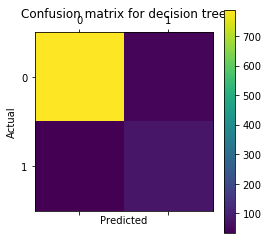

In [92]:
treevote = tree.DecisionTreeClassifier(random_state = 9)
treevote = treevote.fit(vote_train, vote_target_train)
treevotepreds_test = treevote.predict(vote_test)
print("Accuracy on testing data", treevote.score(vote_test, vote_target_test))
print("Accuracy on training data", treevote.score(vote_train, vote_target_train))
print(classification_report(treevotepreds_test, vote_target_test))
treecm = confusion_matrix(treevotepreds_test, vote_target_test)
print(treecm)

plt.matshow(treecm)
plt.title('Confusion matrix for decision tree')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


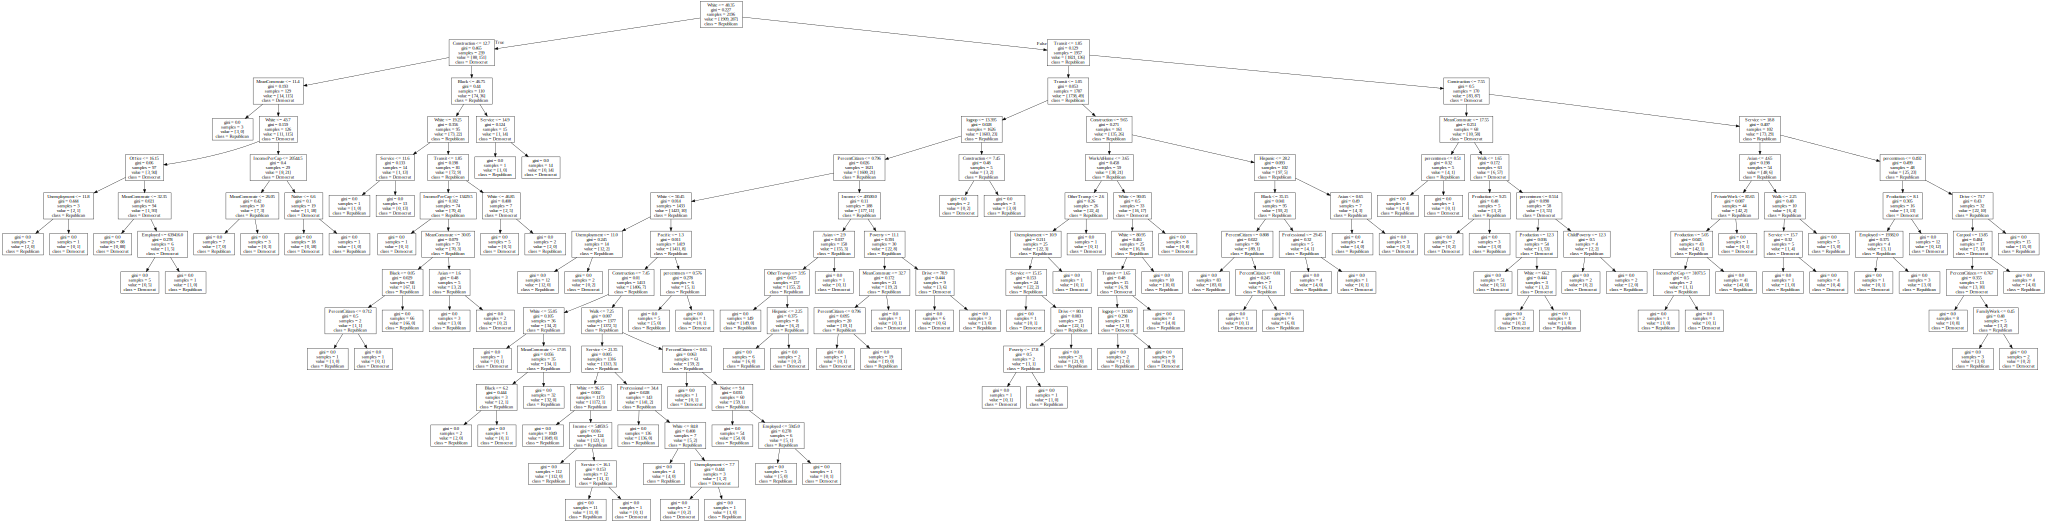

In [93]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn import model_selection

export_graphviz(treevote,out_file='tree.dot', feature_names=vote_train.columns, class_names=["Republican","Democrat"])

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


In [100]:
vote_train2 = vote_train[['White','Construction','Transit','MeanCommute','Service','logpop']]
vote_test2 = vote_test[['White','Construction','Transit','MeanCommute','Service','logpop']]

Accuracy on testing data 0.925690021231
Accuracy on training data 0.969489981785
             precision    recall  f1-score   support

        0.0       0.96      0.95      0.96       831
        1.0       0.67      0.73      0.70       111

avg / total       0.93      0.93      0.93       942

[[791  40]
 [ 30  81]]
Confusion matrix for decision tree with 6 variables


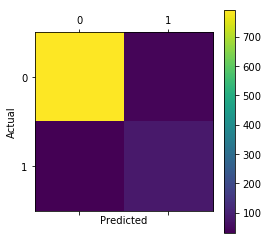

In [119]:
treevote = tree.DecisionTreeClassifier(random_state = 9, max_depth = 6)
treevote = treevote.fit(vote_train2, vote_target_train)
treevotepreds_test = treevote.predict(vote_test2)
print("Accuracy on testing data", treevote.score(vote_test2, vote_target_test))
print("Accuracy on training data", treevote.score(vote_train2, vote_target_train))
print(classification_report(treevotepreds_test, vote_target_test))
treecm = confusion_matrix(treevotepreds_test, vote_target_test)
print(treecm)

plt.matshow(treecm)
print('Confusion matrix for decision tree with 6 variables')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


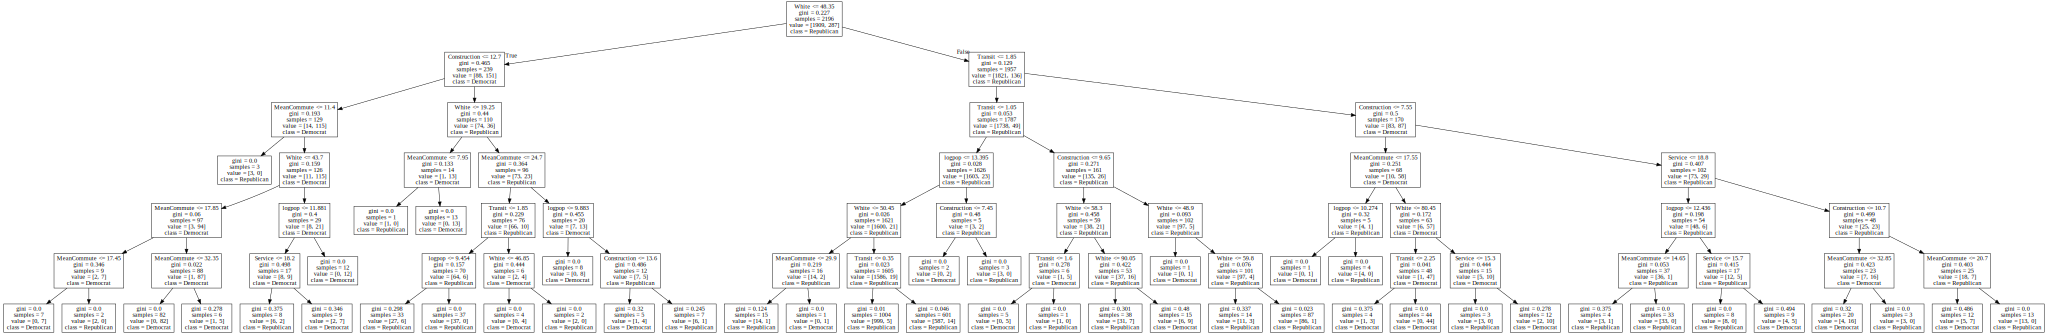

In [120]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn import model_selection

export_graphviz(treevote,out_file='tree.dot', feature_names=vote_train2.columns, class_names=["Republican","Democrat"])

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


Accuracy on testing data 0.926751592357
Accuracy on training data 0.913479052823
             precision    recall  f1-score   support

        0.0       0.96      0.96      0.96       822
        1.0       0.71      0.72      0.71       120

avg / total       0.93      0.93      0.93       942

[[787  35]
 [ 34  86]]


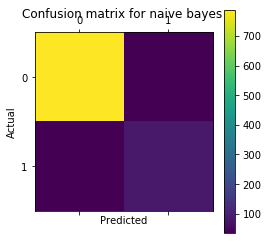

In [115]:
nbvote = naive_bayes.GaussianNB()
nbvote = nbvote.fit(vote_train, vote_target_train)
nbvotepreds_test = nbvote.predict(vote_test)
print("Accuracy on testing data", nbvote.score(vote_test, vote_target_test))
print("Accuracy on training data", nbvote.score(vote_train, vote_target_train))
print(classification_report(nbvotepreds_test, vote_target_test))
nbcm = confusion_matrix(nbvotepreds_test, vote_target_test)
print(nbcm)

plt.matshow(nbcm)
plt.title('Confusion matrix for naive bayes ')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Accuracy on testing data 0.929936305732
Accuracy on training data 0.931238615665
             precision    recall  f1-score   support

        0.0       0.98      0.94      0.96       855
        1.0       0.59      0.82      0.68        87

avg / total       0.94      0.93      0.93       942

[[805  50]
 [ 16  71]]
Confusion matrix for naive bayes with 6 variables


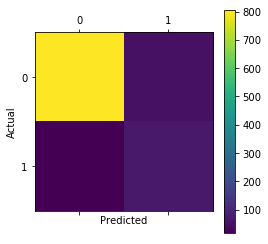

In [113]:
nbvote = naive_bayes.GaussianNB()
nbvote = nbvote.fit(vote_train2, vote_target_train)
nbvotepreds_test = nbvote.predict(vote_test2)
print("Accuracy on testing data", nbvote.score(vote_test2, vote_target_test))
print("Accuracy on training data", nbvote.score(vote_train2, vote_target_train))
print(classification_report(nbvotepreds_test, vote_target_test))
nbcm = confusion_matrix(nbvotepreds_test, vote_target_test)
print(nbcm)

plt.matshow(nbcm)
print('Confusion matrix for naive bayes with 6 variables')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Accuracy on testing data 0.946921443737
Accuracy on training data 0.936703096539
             precision    recall  f1-score   support

        0.0       0.99      0.95      0.97       849
        1.0       0.68      0.88      0.77        93

avg / total       0.96      0.95      0.95       942

[[810  39]
 [ 11  82]]


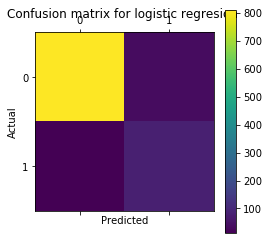

In [109]:
logvote = LogisticRegression(random_state=0).fit(vote_train, vote_target_train)
logvotepreds_test = logvote.predict(vote_test)
print("Accuracy on testing data", logvote.score(vote_test, vote_target_test))
print("Accuracy on training data", logvote.score(vote_train, vote_target_train))
print(classification_report(logvotepreds_test, vote_target_test))
logcm = confusion_matrix(logvotepreds_test, vote_target_test)
print(logcm)

plt.matshow(logcm)
plt.title('Confusion matrix for logistic regresion ')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Accuracy on testing data 0.937367303609
Accuracy on training data 0.940346083789
             precision    recall  f1-score   support

        0.0       0.99      0.95      0.97       849
        1.0       0.68      0.88      0.77        93

avg / total       0.96      0.95      0.95       942

[[810  39]
 [ 11  82]]
Confusion matrix for logistic regresion with 6 variables


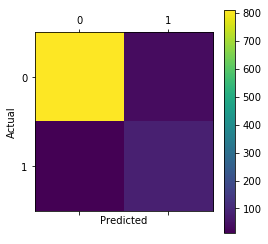

In [112]:
logvote2 = LogisticRegression(random_state=0).fit(vote_train2, vote_target_train)
logvotepreds_test2 = logvote.predict(vote_test)
print("Accuracy on testing data", logvote2.score(vote_test2, vote_target_test))
print("Accuracy on training data", logvote2.score(vote_train2, vote_target_train))
print(classification_report(logvotepreds_test2, vote_target_test))
logcm2 = confusion_matrix(logvotepreds_test2, vote_target_test)
print(logcm2)
print('Confusion matrix for logistic regresion with 6 variables')

plt.matshow(logcm2)
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()